In [ ]:
# loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import colorcet as cc

In [ ]:
# loading dhe data
Brain_mammals = pd.read_csv("/content/mammals with feature engineering 17 09 2024.csv")
# Brain = Brain.drop(['Unnamed: 0'], axis=1)
Brain_mammals.head(8)

,Unnamed: 0,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,...,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m,Forebrain m/Rest m,Cerebellum m/Rest m,Forebrain m/Cerebellum m
0,0,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,5080000.0,47984000.0,58580000.0,...,240081.967213,0.781739,0.469565,2.121739,4.417391e+05,4.172522e+06,5.093913e+06,0.898102,0.539461,1.664815
1,1,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,5632000.0,25324000.0,34958000.0,...,168067.307692,1.555556,0.666667,3.851852,1.042963e+06,4.689630e+06,6.473704e+06,0.954545,0.409091,2.333333
2,2,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,6039000.0,59651000.0,69763000.0,...,277940.239044,0.678832,0.525547,1.832117,4.408029e+05,4.354088e+06,5.092190e+06,1.081395,0.837209,1.291667
3,3,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,6116000.0,44447000.0,55659000.0,...,254150.684932,0.739655,0.418103,1.887931,5.272414e+05,3.831638e+06,4.798190e+06,1.012987,0.572609,1.769072
4,4,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,6150000.0,15740000.0,26880000.0,...,68571.428571,0.521246,0.135977,1.110482,1.742210e+05,4.458924e+05,7.614731e+05,1.150000,0.300000,3.833333
5,5,Commerson's roundleaf bat,Chiroptera,Hipposideridae,0.2430,0.1070,0.588,7877000.0,51875000.0,66719000.0,...,113467.687075,0.238469,0.105005,0.577036,7.730128e+04,5.090775e+05,6.547498e+05,1.021008,0.449580,2.271028
6,6,Smoky shrew,Eulipotyphla,Soricidae,0.0840,0.0200,0.176,9730000.0,20870000.0,36460000.0,...,207159.090909,1.120000,0.266667,2.346667,1.297333e+06,2.782667e+06,4.861333e+06,1.166667,0.277778,4.200000
7,7,Ansell's mole-rat,Rodentia,Bathyergidae,0.3010,0.2070,1.250,9730000.0,75440000.0,102820000.0,...,82256.000000,0.322097,0.221509,1.337614,1.041199e+05,8.072766e+05,1.100268e+06,0.405660,0.278976,1.454106


In [ ]:
Brain_birds = pd.read_csv("/content/birds with feature engineering 17 09 2024.csv")
# Brain = Brain.drop(['Unnamed: 0'], axis=1)
Brain_birds.head(8)

,Unnamed: 0,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,...,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m
0,0,Namaqua dove,Columbiformes,Columbidae,0.240,0.0870,0.555,14167000.0,59533000.0,94490000.0,...,63.004551,59029.166667,684287.356322,170252.252252,0.753532,0.273155,1.742543,444803.767661,1.869168e+06,2.966719e+06
1,1,Common ground dove,Columbiformes,Columbidae,0.246,0.0750,0.572,17602000.0,51380000.0,89630000.0,...,57.324557,71552.845528,685066.666667,156695.804196,0.697338,0.212603,1.621453,498965.331519,1.456473e+06,2.540749e+06
2,2,Diamond dove,Columbiformes,Columbidae,0.240,0.0776,0.545,18209000.0,54101000.0,87879000.0,...,61.563058,75870.833333,697177.835052,161245.871560,0.601052,0.194340,1.364889,456023.040321,1.354896e+06,2.200826e+06
3,3,King quail,Galliformes,Phasianidae,0.220,0.0717,0.521,20523000.0,42945000.0,80478000.0,...,53.362410,93286.363636,598953.974895,154468.330134,0.502168,0.163661,1.189226,468454.690710,9.802556e+05,1.836978e+06
4,4,Common quail,Galliformes,Phasianidae,0.360,0.1090,0.787,22568000.0,75198000.0,117760000.0,...,63.856997,62688.888889,689889.908257,149631.512071,0.379507,0.114906,0.829644,237908.496732,7.927261e+05,1.241408e+06
5,5,Common emerald dove,Columbiformes,Columbidae,0.494,0.1760,1.126,27148000.0,109818000.0,168489000.0,...,65.178142,54955.465587,623965.909091,149634.991119,0.412905,0.147108,0.941157,226914.075560,9.179037e+05,1.408300e+06
6,6,Common bronzewing,Columbiformes,Columbidae,0.869,0.2570,1.848,34077000.0,145208000.0,216703000.0,...,67.007840,39214.039125,565011.673152,117263.528139,0.283964,0.083980,0.603872,111353.647578,4.744972e+05,7.081219e+05
7,7,Pink-necked green pigeon,Columbiformes,Columbidae,0.645,0.2000,1.339,34357000.0,114792000.0,174476000.0,...,65.792430,53266.666667,573960.000000,130303.211352,0.500582,0.155219,1.039193,266643.383780,8.908964e+05,1.354102e+06


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def power_regression(x, y):
    """Fits power regression y = a * x^b and returns coefficients."""
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)

    # Filter positive values (log requires >0)
    mask = (x > 0) & (y > 0)
    x, y = x[mask], y[mask]

    if len(x) < 2:  # not enough points
        return None, None, None

    log_x = np.log(x)
    log_y = np.log(y)

    slope, intercept, r_value, _, _ = linregress(log_x, log_y)
    a = np.exp(intercept)
    b = slope
    r2 = r_value**2

    return a, b, r2

def analyze_orders(df, plot=True):
    results = {}

    for order, group in df.groupby("Order"):
        x = group["Forebrain m"].values
        y = group["Forebrain n"].values

        a, b, r2 = power_regression(x, y)
        if a is None:
            continue

        formula = f"y = {a:.4f} * x^{b:.4f}"
        results[order] = {"a": a, "b": b, "R²": r2, "formula": formula}

        print(f"Order: {order}")
        print(f"  Formula: {formula}")
        print(f"  R² = {r2:.4f}\n")

        if plot:
            # Plot each order separately
            plt.scatter(x, y, label=f"{order} data")
            x_fit = np.linspace(min(x), max(x), 200)
            y_fit = a * x_fit**b
            plt.plot(x_fit, y_fit, label=f"{order} fit")

    if plot:
        plt.xlabel("Forebrain mass (m)")
        plt.ylabel("Forebrain neurons (n)")
        plt.title("Power Regression by Order")
        plt.legend()
        plt.grid(True)
        plt.show()

    return results


# Example usage (replace with your CSV file)
# df = pd.read_csv("brain_dataset.csv")
# results = analyze_orders(df, plot=True)


Order: Artiodactyla
  Formula: y = 13364584.2285 * x^0.8148
  R² = 0.8730

Order: Carnivora
  Formula: y = 44757957.9565 * x^0.5892
  R² = 0.5759

Order: Chiroptera
  Formula: y = 22423615.3228 * x^0.5689
  R² = 0.8938

Order: Didelphimorphia
  Formula: y = 26518118.4030 * x^0.4311
  R² = 0.7009

Order: Diprotodontia
  Formula: y = 32790939.0873 * x^0.6826
  R² = 0.8824

Order: Eulipotyphla
  Formula: y = 27598022.5770 * x^0.4505
  R² = 0.7504

Order: Hyracoidea
  Formula: y = 1348098.3314 * x^2.1237
  R² = 1.0000

Order: Macroscelidea
  Formula: y = 31962168.0818 * x^0.2811
  R² = 1.0000

Order: Primates
  Formula: y = 45113244.8647 * x^0.8762
  R² = 0.9560

Order: Rodentia
  Formula: y = 32156372.2231 * x^0.6095
  R² = 0.9223



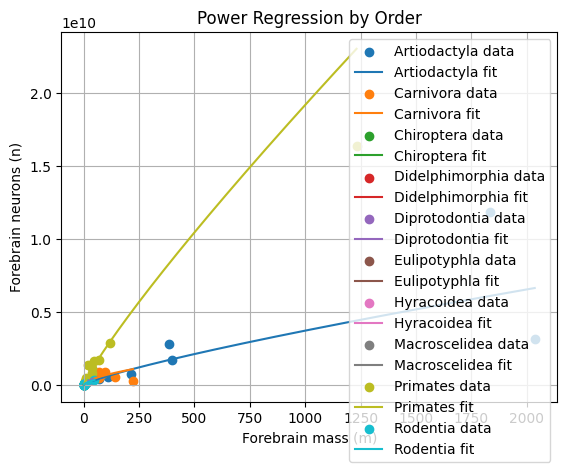

{'Artiodactyla': {'a': np.float64(13364584.228503196),
  'b': np.float64(0.8147688063342448),
  'R²': np.float64(0.8730311602548181),
  'formula': 'y = 13364584.2285 * x^0.8148'},
 'Carnivora': {'a': np.float64(44757957.956457734),
  'b': np.float64(0.5891770573598835),
  'R²': np.float64(0.5759188425343912),
  'formula': 'y = 44757957.9565 * x^0.5892'},
 'Chiroptera': {'a': np.float64(22423615.32278272),
  'b': np.float64(0.5688920655706657),
  'R²': np.float64(0.8938356804013977),
  'formula': 'y = 22423615.3228 * x^0.5689'},
 'Didelphimorphia': {'a': np.float64(26518118.403025582),
  'b': np.float64(0.431143317347922),
  'R²': np.float64(0.7009106386943257),
  'formula': 'y = 26518118.4030 * x^0.4311'},
 'Diprotodontia': {'a': np.float64(32790939.08732061),
  'b': np.float64(0.682565733414059),
  'R²': np.float64(0.8823860184585658),
  'formula': 'y = 32790939.0873 * x^0.6826'},
 'Eulipotyphla': {'a': np.float64(27598022.57699768),
  'b': np.float64(0.4505040490435971),
  'R²': np.f

In [ ]:
analyze_orders(Brain_mammals, plot=True)

Order: Accipitriformes
  Formula: y = 84062472.7396 * x^0.7602
  R² = 0.7779

Order: Anseriformes
  Formula: y = 83280515.0267 * x^0.6325
  R² = 0.6008

Order: Bucerotiformes
  Formula: y = 153970642.5073 * x^0.9124
  R² = 0.9971

Order: Columbiformes
  Formula: y = 52448144.9371 * x^0.7381
  R² = 0.8093

Order: Coraciiformes
  Formula: y = 64468305.7835 * x^0.9628
  R² = 1.0000

Order: Falconiformes
  Formula: y = 146979880.7691 * x^0.7725
  R² = 0.9989

Order: Galliformes
  Formula: y = 54339583.5254 * x^0.6427
  R² = 0.8737

Order: Passeriformes
  Formula: y = 169728573.7499 * x^0.8495
  R² = 0.9357

Order: Piciformes
  Formula: y = 154508183.7458 * x^0.8104
  R² = 0.9413

Order: Psittaciformes
  Formula: y = 176886534.3693 * x^0.8911
  R² = 0.9737

Order: Strigiformes
  Formula: y = 274833765.7109 * x^0.6746
  R² = 0.7617

Order: Struthioniformes
  Formula: y = 57105705.4112 * x^0.6687
  R² = 0.9897



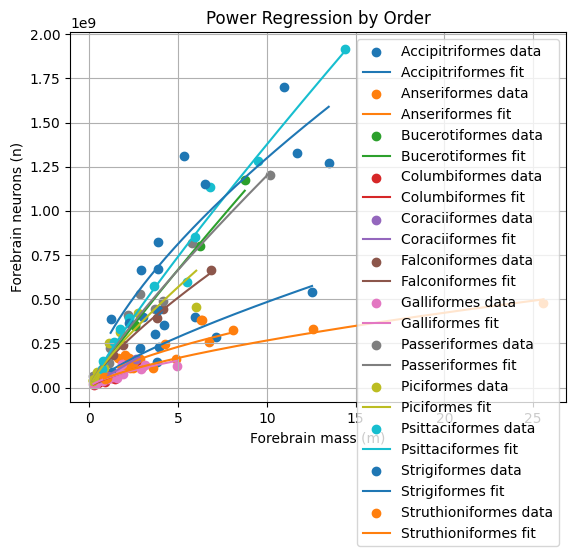

{'Accipitriformes': {'a': np.float64(84062472.7395952),
  'b': np.float64(0.760192290780315),
  'R²': np.float64(0.7778991925577513),
  'formula': 'y = 84062472.7396 * x^0.7602'},
 'Anseriformes': {'a': np.float64(83280515.02668528),
  'b': np.float64(0.6324866296997458),
  'R²': np.float64(0.6008367962173996),
  'formula': 'y = 83280515.0267 * x^0.6325'},
 'Bucerotiformes': {'a': np.float64(153970642.50726023),
  'b': np.float64(0.9124133443714704),
  'R²': np.float64(0.9971359871388266),
  'formula': 'y = 153970642.5073 * x^0.9124'},
 'Columbiformes': {'a': np.float64(52448144.93708316),
  'b': np.float64(0.7380670504695843),
  'R²': np.float64(0.8092902861435216),
  'formula': 'y = 52448144.9371 * x^0.7381'},
 'Coraciiformes': {'a': np.float64(64468305.78345359),
  'b': np.float64(0.9628083642648613),
  'R²': np.float64(1.0),
  'formula': 'y = 64468305.7835 * x^0.9628'},
 'Falconiformes': {'a': np.float64(146979880.76909313),
  'b': np.float64(0.7725021026591249),
  'R²': np.float64

In [ ]:
analyze_orders(Brain_birds, plot=True)

In [ ]:
def analyze_orders_cerebellum(df, plot=True):
    results = {}

    for order, group in df.groupby("Order"):
        x = group["Cerebellum m"].values
        y = group["Cerebellum n"].values

        a, b, r2 = power_regression(x, y)
        if a is None:
            continue

        formula = f"y = {a:.4f} * x^{b:.4f}"
        results[order] = {"a": a, "b": b, "R²": r2, "formula": formula}

        print(f"Order: {order}")
        print(f"  Formula: {formula}")
        print(f"  R² = {r2:.4f}\n")

        if plot:
            # Plot each order separately
            plt.scatter(x, y, label=f"{order} data")
            x_fit = np.linspace(min(x), max(x), 200)
            y_fit = a * x_fit**b
            plt.plot(x_fit, y_fit, label=f"{order} fit")

    if plot:
        plt.xlabel("Cerebellum mass (m)")
        plt.ylabel("Cerebellum neurons (n)")
        plt.title("Power Regression by Order")
        plt.legend()
        plt.grid(True)
        plt.show()

    return results

Order: Artiodactyla
  Formula: y = 180176892.4771 * x^1.0018
  R² = 0.9594

Order: Carnivora
  Formula: y = 351326955.6980 * x^0.8482
  R² = 0.9079

Order: Chiroptera
  Formula: y = 408043087.8621 * x^0.7968
  R² = 0.9407

Order: Didelphimorphia
  Formula: y = 392037406.7988 * x^0.8809
  R² = 0.9759

Order: Diprotodontia
  Formula: y = 349599548.8066 * x^0.8592
  R² = 0.9953

Order: Eulipotyphla
  Formula: y = 831983458.1230 * x^0.9536
  R² = 0.9802

Order: Hyracoidea
  Formula: y = 22048613.3319 * x^4.2922
  R² = 1.0000

Order: Macroscelidea
  Formula: y = 170120365.7803 * x^0.3612
  R² = 1.0000

Order: Primates
  Formula: y = 536210600.3490 * x^0.9621
  R² = 0.9888

Order: Rodentia
  Formula: y = 332254541.7746 * x^0.7866
  R² = 0.9370



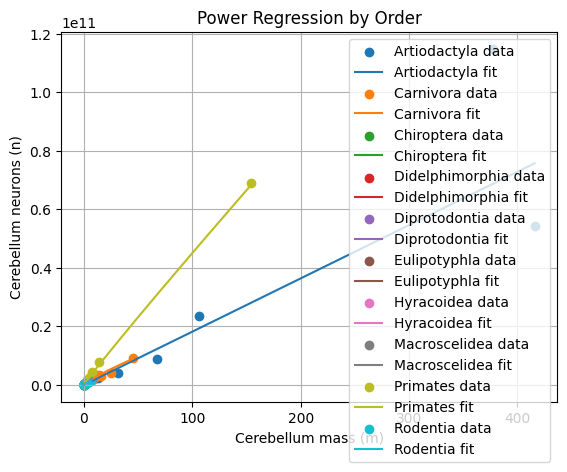

{'Artiodactyla': {'a': np.float64(180176892.47712892),
  'b': np.float64(1.0018413683082177),
  'R²': np.float64(0.9593723521933426),
  'formula': 'y = 180176892.4771 * x^1.0018'},
 'Carnivora': {'a': np.float64(351326955.6979748),
  'b': np.float64(0.8481984932124146),
  'R²': np.float64(0.9079499006249312),
  'formula': 'y = 351326955.6980 * x^0.8482'},
 'Chiroptera': {'a': np.float64(408043087.86210114),
  'b': np.float64(0.7968125455697592),
  'R²': np.float64(0.9407045894441216),
  'formula': 'y = 408043087.8621 * x^0.7968'},
 'Didelphimorphia': {'a': np.float64(392037406.7988178),
  'b': np.float64(0.8809214555171672),
  'R²': np.float64(0.9759158651912649),
  'formula': 'y = 392037406.7988 * x^0.8809'},
 'Diprotodontia': {'a': np.float64(349599548.8066498),
  'b': np.float64(0.8592305393938914),
  'R²': np.float64(0.9952659555445567),
  'formula': 'y = 349599548.8066 * x^0.8592'},
 'Eulipotyphla': {'a': np.float64(831983458.1230388),
  'b': np.float64(0.9535667097424052),
  'R²'

In [ ]:
analyze_orders_cerebellum(Brain_mammals, plot=True)

Order: Accipitriformes
  Formula: y = 459489103.9660 * x^0.7635
  R² = 0.9564

Order: Anseriformes
  Formula: y = 338334131.1300 * x^0.7891
  R² = 0.7883

Order: Bucerotiformes
  Formula: y = 578038030.5471 * x^0.8205
  R² = 0.9744

Order: Columbiformes
  Formula: y = 423349609.8989 * x^0.8138
  R² = 0.9765

Order: Coraciiformes
  Formula: y = 390076746.5369 * x^0.6672
  R² = 1.0000

Order: Falconiformes
  Formula: y = 539911160.4798 * x^0.7949
  R² = 0.9985

Order: Galliformes
  Formula: y = 380141600.0772 * x^0.8121
  R² = 0.9451

Order: Passeriformes
  Formula: y = 725247592.8178 * x^0.8217
  R² = 0.9717

Order: Piciformes
  Formula: y = 623275534.8521 * x^0.8415
  R² = 0.9824

Order: Psittaciformes
  Formula: y = 593665133.3214 * x^0.8223
  R² = 0.9733

Order: Strigiformes
  Formula: y = 426309146.9338 * x^0.7825
  R² = 0.9029

Order: Struthioniformes
  Formula: y = 325337384.9818 * x^0.6332
  R² = 0.9929



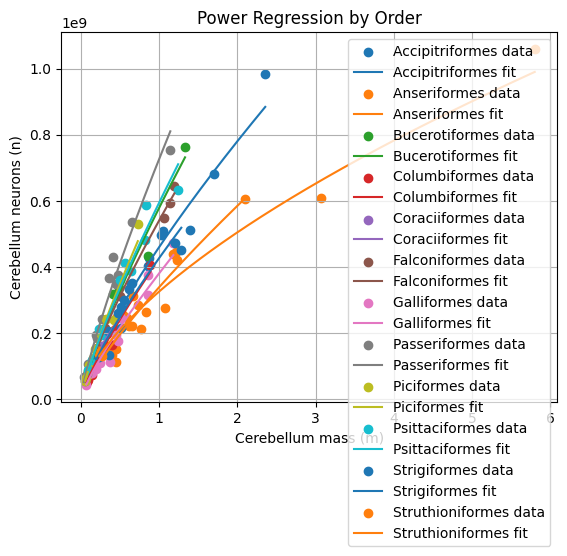

{'Accipitriformes': {'a': np.float64(459489103.9660269),
  'b': np.float64(0.7634696111642129),
  'R²': np.float64(0.9563602126767388),
  'formula': 'y = 459489103.9660 * x^0.7635'},
 'Anseriformes': {'a': np.float64(338334131.130011),
  'b': np.float64(0.7891306680682998),
  'R²': np.float64(0.7883344864568904),
  'formula': 'y = 338334131.1300 * x^0.7891'},
 'Bucerotiformes': {'a': np.float64(578038030.5471408),
  'b': np.float64(0.8205214203572426),
  'R²': np.float64(0.9743852007837246),
  'formula': 'y = 578038030.5471 * x^0.8205'},
 'Columbiformes': {'a': np.float64(423349609.89889705),
  'b': np.float64(0.8137996732251177),
  'R²': np.float64(0.9764908788533633),
  'formula': 'y = 423349609.8989 * x^0.8138'},
 'Coraciiformes': {'a': np.float64(390076746.5369092),
  'b': np.float64(0.6671955380449598),
  'R²': np.float64(0.9999999999999996),
  'formula': 'y = 390076746.5369 * x^0.6672'},
 'Falconiformes': {'a': np.float64(539911160.4797506),
  'b': np.float64(0.7948500571252967),

In [ ]:
analyze_orders_cerebellum(Brain_birds, plot=True)